# Feature-embedding correlation

Using embedding matrix obtained by the CNN model, correlate neural network embeddings to extracted morphology features.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## T type

### Compute correlation between features and embeddings

In [3]:
# Gather neural network embeddings from last layer
embeddings = pd.read_csv("gouwens-data/t_type_embeddings_fc2.csv", index_col=0)
embeddings.columns = [
    'Lamp5 Lsp1', 
    'Lamp5 Plch2', 
    'Pvalb Reln', 
    'Pvalb Sema3e', 
    'Pvalb Tpbg', 
    'Sncg Vip', 
    'Sst Calb2', 
    'Sst Chodl', 
    'Sst Crhr2', 
    'Sst Esm1', 
    'Sst Hpse', 
    'Sst Mme', 
    'Sst Myh8', 
    'Sst Nts', 
    'Sst Rxfp1', 
    'Sst Tac1', 
    'Sst Tac2', 
    'Vip Crispld2', 
    'Vip Lmo1', 
    'Vip Pygm'
]
embeddings

,Lamp5 Lsp1,Lamp5 Plch2,Pvalb Reln,Pvalb Sema3e,Pvalb Tpbg,Sncg Vip,Sst Calb2,Sst Chodl,Sst Crhr2,Sst Esm1,Sst Hpse,Sst Mme,Sst Myh8,Sst Nts,Sst Rxfp1,Sst Tac1,Sst Tac2,Vip Crispld2,Vip Lmo1,Vip Pygm
Specimen ID,,,,,,,,,,,,,,,,,,,,
714755043,-1.438648,1.202198,2.770387,2.304905,-6.435030,-0.038825,-2.683684,4.626194,0.194383,-0.906304,-3.630938,-4.069282,-4.240396,0.503099,0.199415,-2.351067,-6.509098,-5.366389,-3.356257,-2.279273
658012080,-1.974563,-2.274762,1.962222,1.060160,-8.427499,-0.196557,-3.298840,0.449816,7.026308,-3.709658,-1.363945,-2.495889,-3.553386,-0.450685,0.332912,-2.305081,-3.280610,-10.847079,-5.019625,-3.662455
827447865,0.534139,9.071040,-0.739950,-4.328860,-2.917947,-2.386240,1.576169,-0.211841,-4.567938,-2.859246,2.775482,-5.558514,-5.291920,-3.351642,-2.271985,1.679763,-2.712330,-1.861196,-5.516003,-5.625017
808875776,-4.289413,-3.653552,0.224896,-4.825840,-3.928817,-2.912835,0.596076,-5.185075,-1.834822,0.660958,5.876694,-1.447736,-3.102657,-0.847575,-1.892198,-2.952109,-0.147458,-2.747520,1.150456,-3.041169
829195312,-3.391823,-1.571495,-1.747168,-6.963184,-1.801356,-1.053335,0.308747,-4.215257,-5.643273,-2.360042,-0.373744,-1.426782,-1.422130,-1.395883,-3.522862,-1.795513,0.282698,5.994076,0.675101,-0.896528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692565557,-3.955338,-2.398103,-0.740834,-3.286470,-8.971046,-4.881967,-4.794002,-7.203790,-2.573257,3.682183,2.900749,-5.150925,-0.088884,0.456135,6.876352,-2.775214,-2.957258,-2.907619,0.849933,1.217233
646852171,-0.337578,-2.357516,5.694481,-5.605803,-0.643999,-0.049512,-0.295234,-1.437347,-0.544448,-2.655547,-1.163939,-1.165495,-0.908240,-1.448029,-2.008622,1.432586,-1.546952,-3.332724,-4.634047,-3.554810
601811091,-5.529853,-7.045742,2.511449,-6.299623,-3.526481,-3.341348,0.111976,-1.668611,1.112712,10.267307,1.421849,-2.604550,-4.294046,0.829584,0.458136,-2.414930,-5.498590,-8.859011,-1.568842,-2.729902


In [4]:
# Gather extracted morphology features
features = pd.read_csv("extracted_features.csv")
features = features.drop(["T type", "MET type"], axis=1)
features = features[features["Specimen ID"].isin(embeddings.index)]
features = features.set_index("Specimen ID")
features

,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,Axon Hist Pc 1,Axon Hist Pc 2,Axon Hist Pc 3,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
Specimen ID,,,,,,,,,,,,,,,,,,,,,
714755043,0.076087,0.021594,0.828949,14.596909,0.460521,0.258804,-704.739932,-18.761695,319.569827,74.102948,...,0.025154,0.839016,0.275014,0.419788,0.000000,0.00,0.333333,0.666667,2.522126,0.723234
658012080,0.135356,0.111187,0.855302,10.753656,0.690728,0.454090,-1254.649974,-187.936728,910.070179,506.015145,...,0.036473,0.963527,0.373547,0.580762,0.400000,0.00,0.400000,0.200000,3.656877,0.825192
827447865,0.066712,0.106764,0.798974,11.195610,0.424800,0.586675,786.188159,-735.106837,-962.950372,977.809846,...,0.000000,1.000000,0.364856,0.507987,0.200000,0.00,0.200000,0.600000,2.522022,0.321378
808875776,0.106151,0.200166,0.841442,13.436469,0.340889,0.593804,-305.607538,-30.011692,-891.574251,-521.329547,...,0.034576,0.965424,0.283630,0.588331,0.400000,0.00,0.000000,0.600000,2.391990,0.553258
829195312,0.000556,0.287665,0.848207,22.412643,0.290394,0.662710,134.993804,-111.360885,-370.225143,17.630340,...,0.000000,1.000000,0.364030,0.619901,0.333333,0.00,0.333333,0.333333,2.055931,0.240781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692565557,0.057463,0.302951,0.861406,25.438343,0.677467,0.811727,-693.130384,80.354069,214.963381,29.890947,...,0.000000,1.000000,0.416236,0.497415,0.000000,0.20,0.600000,0.200000,2.656202,0.759089
646852171,0.028664,0.021350,0.853973,3.024985,0.318936,0.424402,-79.440785,-356.255902,-1150.192438,516.039587,...,0.000000,1.000000,0.300813,0.000000,0.000000,0.25,0.250000,0.500000,1.303221,0.503709
601811091,0.005654,0.459159,0.850263,41.430893,0.686437,1.020017,-485.913541,-135.069901,45.262030,-150.593571,...,0.000000,1.000000,0.244280,0.431365,0.250000,0.00,0.250000,0.500000,3.468154,0.824576


In [5]:
# Generate correlation matrix
nodes = list(embeddings.columns)
feats = list(features.columns)

corr_matrix = np.zeros((len(nodes), len(feats)))

for i, node in enumerate(nodes):
    for j, feat in enumerate(feats):
        corr_matrix[i, j] = scipy.stats.spearmanr(embeddings[node], features[feat]).correlation

corr_df = pd.DataFrame(corr_matrix, columns=feats)
corr_df.index = nodes
corr_df

,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,Axon Hist Pc 1,Axon Hist Pc 2,Axon Hist Pc 3,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
Lamp5 Lsp1,0.119649,-0.392139,0.023668,-0.418148,0.221600,-0.320743,0.238337,-0.215329,0.331555,0.107212,...,-0.232358,0.206478,0.048936,-0.100986,-0.064897,0.035066,0.071291,-0.044671,-0.095953,-0.256806
Lamp5 Plch2,0.009975,-0.423383,-0.110207,-0.363262,0.097718,-0.297901,0.435929,0.021875,0.145225,0.181519,...,-0.184543,0.204295,0.029457,-0.192536,0.024670,-0.081873,-0.019776,0.045831,-0.148323,-0.450146
Pvalb Reln,0.089332,-0.133160,0.236153,-0.161738,0.425519,0.023287,0.173103,-0.227013,0.285198,0.124528,...,-0.202667,0.304722,0.040079,-0.130957,-0.104709,0.023825,0.142817,-0.064126,-0.038892,-0.044141
Pvalb Sema3e,0.185433,-0.158078,-0.021678,-0.280477,0.147487,-0.400696,-0.576289,0.071477,0.114304,0.021580,...,0.088668,-0.203956,0.016440,0.062596,-0.141708,0.253325,0.143185,-0.152268,-0.037345,0.329709
Pvalb Tpbg,-0.146083,-0.090527,-0.062170,-0.010590,-0.242787,0.014074,0.639644,0.026986,0.015007,-0.081844,...,-0.141636,0.144216,-0.052266,-0.051406,0.207948,-0.287455,-0.181946,0.165100,-0.170510,-0.564543
Sncg Vip,0.068520,-0.261651,0.052098,-0.322541,0.125440,-0.291186,0.072959,-0.060577,0.286559,0.007995,...,-0.224800,0.029228,0.030927,-0.077122,0.005488,0.014073,0.029605,-0.038679,-0.132553,-0.237383
Sst Calb2,-0.111587,-0.046696,-0.043204,0.074201,-0.122301,0.112480,0.613786,0.130678,-0.080594,-0.052587,...,0.043555,0.140851,0.022149,-0.077693,0.114820,-0.231853,-0.128396,0.146019,-0.032483,-0.426596
Sst Chodl,0.148600,-0.458410,-0.045354,-0.516972,0.218233,-0.560608,-0.005991,-0.076583,0.262514,0.124276,...,-0.091370,-0.024386,0.013807,-0.166864,-0.095992,0.059418,0.085297,-0.043833,-0.127934,-0.136657
Sst Crhr2,0.119589,-0.021074,0.133102,-0.127239,0.252714,-0.186053,-0.614279,-0.141412,0.122731,0.073660,...,0.134435,-0.134556,0.025404,0.076468,-0.207488,0.243861,0.196788,-0.165809,0.095695,0.527466
Sst Esm1,-0.015862,0.307810,0.072395,0.406619,-0.092682,0.326942,-0.308171,0.051870,-0.197467,-0.095378,...,0.180690,-0.066676,-0.032170,0.210485,0.003373,0.039764,0.036896,-0.066299,0.138063,0.403681


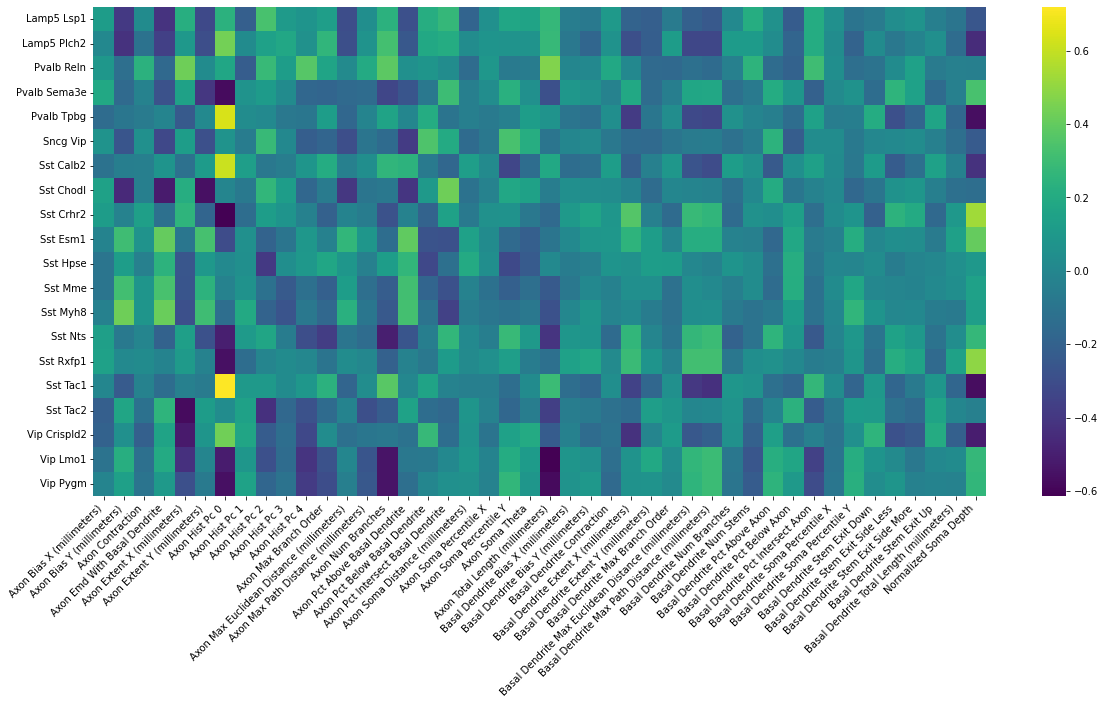

In [6]:
# Heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(20, 9))
h = sns.heatmap(corr_df, fmt="g", cmap="viridis")
h.set_xticklabels(h.get_xticklabels(),
                  horizontalalignment='right',
                          rotation=45) 
plt.show()           

In [6]:
corr_df.to_csv("gouwens-data/t_type_corr_fc2.csv")

In [76]:
# Collect types with corr > 0.5
corr_dict = {
    "node": [],
    "feature": [],
    "corr": []
}

for index, row in corr_df.iterrows():
    for col, val in row.items():
        if np.absolute(val) > 0.5:
            corr_dict["node"].append(index)
            corr_dict["feature"].append(col)
            corr_dict["corr"].append(val)
            
pd.DataFrame(corr_dict)

,node,feature,corr
0,Pvalb Sema3e,Axon Hist Pc 0,-0.576289
1,Pvalb Tpbg,Axon Hist Pc 0,0.639644
2,Pvalb Tpbg,Normalized Soma Depth,-0.564543
3,Sst Calb2,Axon Hist Pc 0,0.613786
4,Sst Chodl,Axon Emd With Basal Dendrite,-0.516972
5,Sst Chodl,Axon Extent Y (millimeters),-0.560608
6,Sst Crhr2,Axon Hist Pc 0,-0.614279
7,Sst Crhr2,Normalized Soma Depth,0.527466
8,Sst Nts,Axon Hist Pc 0,-0.500724
9,Sst Nts,Axon Num Branches,-0.502982


### Examine correlation relationships between a single feature and all embeddings

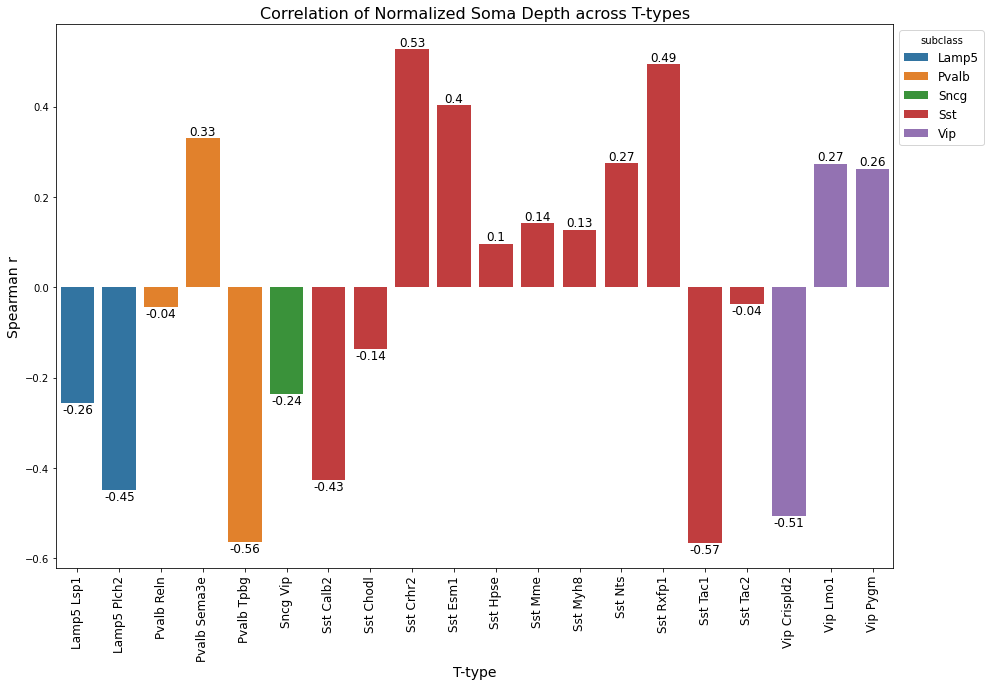

In [78]:
feature = "Normalized Soma Depth"
data = {}
data["t_type"] = corr_df[feature].index
data["corr"] = corr_df[feature].values
data["subclass"] = [t.split(" ")[0] for t in corr_df[feature].index]

fig, ax = plt.subplots(figsize=(15, 10))
bp = sns.barplot(data=pd.DataFrame(data), x="t_type", y="corr", hue="subclass", dodge=False)
bp.set_xticklabels(bp.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='center',
                          fontsize=12)
bp.set_xlabel("T-type", fontsize=14)
bp.set_ylabel("Spearman r", fontsize=14)
bp.set_title("Correlation of Normalized Soma Depth across T-types", fontsize=16)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize=12)

for c in ax.containers:
    ax.bar_label(c, labels=np.round(data["corr"], decimals=2), fontsize=12)

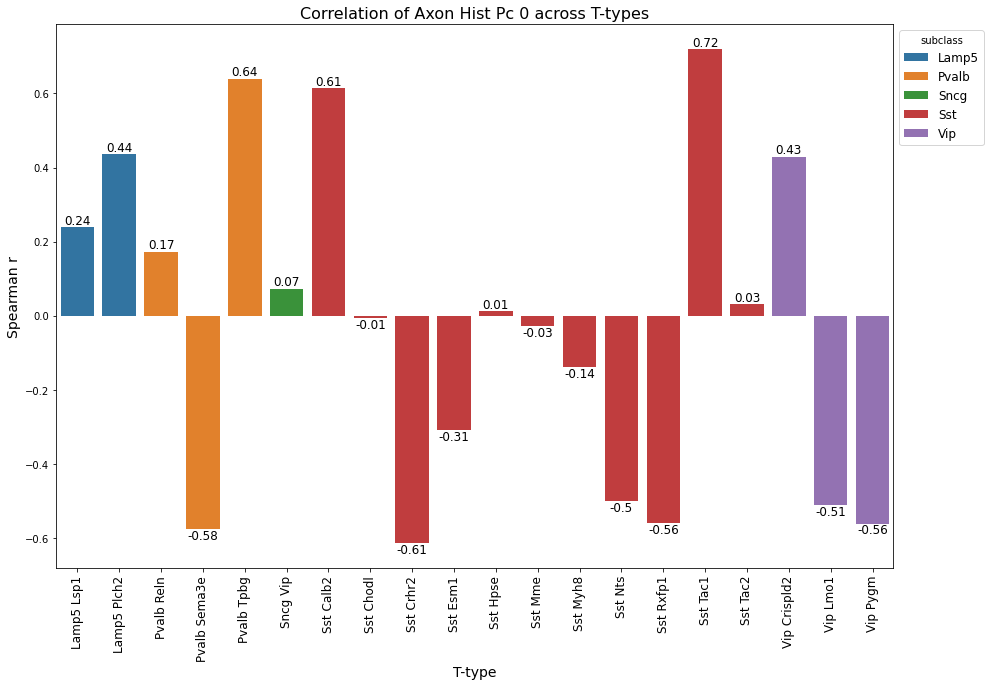

In [79]:
feature = "Axon Hist Pc 0"
data = {}
data["t_type"] = corr_df[feature].index
data["corr"] = corr_df[feature].values
data["subclass"] = [t.split(" ")[0] for t in corr_df[feature].index]

fig, ax = plt.subplots(figsize=(15, 10))
bp = sns.barplot(data=pd.DataFrame(data), x="t_type", y="corr", hue="subclass", dodge=False)
bp.set_xticklabels(bp.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='center',
                          fontsize=12)
bp.set_xlabel("T-type", fontsize=14)
bp.set_ylabel("Spearman r", fontsize=14)
bp.set_title("Correlation of Axon Hist Pc 0 across T-types", fontsize=16)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize=12)

for c in ax.containers:
    ax.bar_label(c, labels=np.round(data["corr"], decimals=2), fontsize=12)

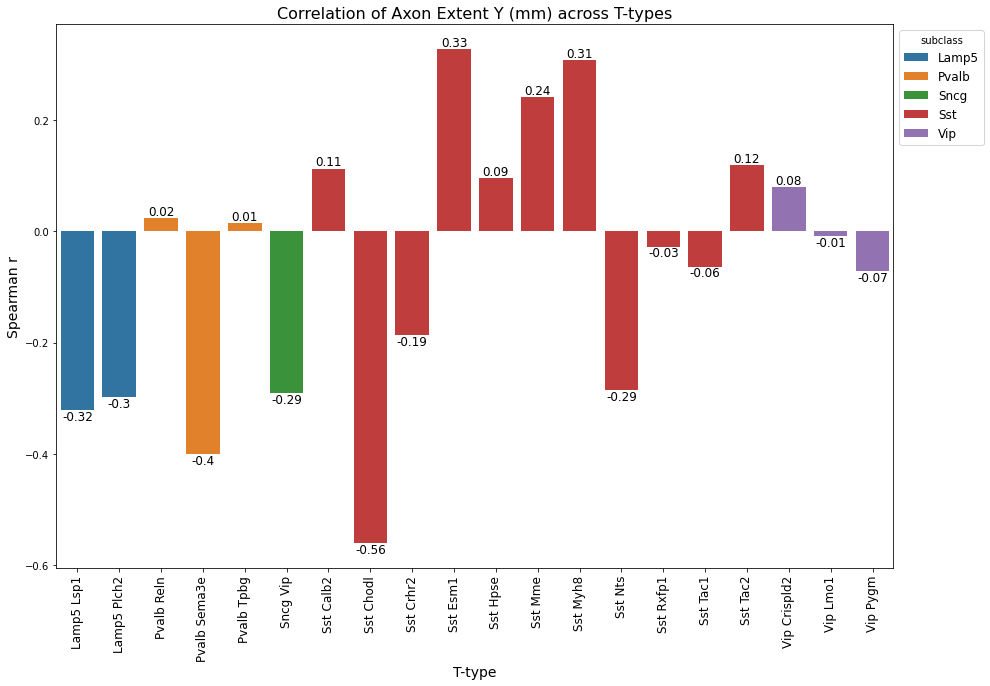

In [82]:
feature = "Axon Extent Y (millimeters)"
data = {}
data["t_type"] = corr_df[feature].index
data["corr"] = corr_df[feature].values
data["subclass"] = [t.split(" ")[0] for t in corr_df[feature].index]

fig, ax = plt.subplots(figsize=(15, 10))
bp = sns.barplot(data=pd.DataFrame(data), x="t_type", y="corr", hue="subclass", dodge=False)
bp.set_xticklabels(bp.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='center',
                          fontsize=12)
bp.set_xlabel("T-type", fontsize=14)
bp.set_ylabel("Spearman r", fontsize=14)
bp.set_title("Correlation of Axon Extent Y (mm) across T-types", fontsize=16)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize=12)

for c in ax.containers:
    ax.bar_label(c, labels=np.round(data["corr"], decimals=2), fontsize=12)

### Recompute correlation matrix with modified (dendrite-focused) images

In [29]:
# Gather neural network embeddings from last layer
embeddings = pd.read_csv("gouwens-data/t_type_embeddings_modified.csv", index_col=0)
embeddings.columns = [
    'Lamp5 Lsp1', 
    'Lamp5 Plch2', 
    'Pvalb Reln', 
    'Pvalb Sema3e', 
    'Pvalb Tpbg', 
    'Sncg Vip', 
    'Sst Calb2', 
    'Sst Chodl', 
    'Sst Crhr2', 
    'Sst Esm1', 
    'Sst Hpse', 
    'Sst Mme', 
    'Sst Myh8', 
    'Sst Nts', 
    'Sst Rxfp1', 
    'Sst Tac1', 
    'Sst Tac2', 
    'Vip Crispld2', 
    'Vip Lmo1', 
    'Vip Pygm'
]
embeddings

,Lamp5 Lsp1,Lamp5 Plch2,Pvalb Reln,Pvalb Sema3e,Pvalb Tpbg,Sncg Vip,Sst Calb2,Sst Chodl,Sst Crhr2,Sst Esm1,Sst Hpse,Sst Mme,Sst Myh8,Sst Nts,Sst Rxfp1,Sst Tac1,Sst Tac2,Vip Crispld2,Vip Lmo1,Vip Pygm
Specimen ID,,,,,,,,,,,,,,,,,,,,
714755043,-2.096526,2.004482,1.724687,-0.136174,-2.146532,-0.788744,0.292137,3.958911,-0.143505,0.782945,-0.523339,-1.625874,-1.547468,0.150933,2.078600,-2.231151,-3.262998,-2.758742,0.305112,-1.710819
658012080,-2.157098,-0.868412,0.811219,1.566242,-3.496339,-1.191584,-0.570486,0.490564,4.451562,0.358565,0.565147,-1.323000,-1.753077,1.203591,3.066994,-0.579362,0.387148,-4.784307,-0.514287,-0.376742
827447865,1.112276,2.926001,0.277844,-2.213170,1.168114,-0.134164,2.268185,-0.713020,-1.737164,-1.220058,0.443122,-1.838400,-2.082107,-1.394270,0.340063,-0.720987,-1.646711,0.924531,0.311806,-1.177327
808875776,-2.274143,-1.797568,0.575675,-1.027654,-1.038137,-2.480665,2.566141,-0.740191,1.231603,0.600973,4.694256,-0.325716,-1.748335,-0.734251,-0.168858,-0.399610,2.296275,-2.114263,0.508568,-0.987029
829195312,-0.435077,1.634767,-0.085304,-1.513395,1.884084,0.071953,1.730648,-2.263817,-1.967332,-1.350440,-0.258346,-0.997237,-1.981333,-0.807317,-0.114353,-0.241781,-0.638564,4.261083,2.217835,0.294879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692565557,-3.200961,-1.904896,0.412262,-1.939900,-3.226599,-2.316819,-0.388128,-1.652968,2.691533,3.112221,2.477990,-0.574325,1.028131,1.738099,3.340335,-1.107950,0.322009,-3.804296,2.084098,1.012529
646852171,0.483020,0.281165,3.501708,-1.232446,2.631858,1.050381,1.627144,0.380452,-1.794145,-2.696113,-1.510459,-1.301736,-1.665669,-0.911279,0.906298,0.892814,-0.868757,-0.231620,-1.699648,-1.282940
601811091,-3.543146,-2.587828,2.397176,-0.446707,-2.014372,-2.232733,1.394066,-0.105790,3.084680,5.450405,3.577505,-1.550937,-1.043829,0.155360,2.925647,-0.973533,0.165443,-4.890105,-0.171201,-0.502972


In [30]:
# Gather extracted morphology features
features = pd.read_csv("extracted_features.csv")
features = features.drop(["T type", "MET type"], axis=1)
features = features[features["Specimen ID"].isin(embeddings.index)]
features = features.set_index("Specimen ID")
features

,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,Axon Hist Pc 1,Axon Hist Pc 2,Axon Hist Pc 3,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
Specimen ID,,,,,,,,,,,,,,,,,,,,,
714755043,0.076087,0.021594,0.828949,14.596909,0.460521,0.258804,-704.739932,-18.761695,319.569827,74.102948,...,0.025154,0.839016,0.275014,0.419788,0.000000,0.00,0.333333,0.666667,2.522126,0.723234
658012080,0.135356,0.111187,0.855302,10.753656,0.690728,0.454090,-1254.649974,-187.936728,910.070179,506.015145,...,0.036473,0.963527,0.373547,0.580762,0.400000,0.00,0.400000,0.200000,3.656877,0.825192
827447865,0.066712,0.106764,0.798974,11.195610,0.424800,0.586675,786.188159,-735.106837,-962.950372,977.809846,...,0.000000,1.000000,0.364856,0.507987,0.200000,0.00,0.200000,0.600000,2.522022,0.321378
808875776,0.106151,0.200166,0.841442,13.436469,0.340889,0.593804,-305.607538,-30.011692,-891.574251,-521.329547,...,0.034576,0.965424,0.283630,0.588331,0.400000,0.00,0.000000,0.600000,2.391990,0.553258
829195312,0.000556,0.287665,0.848207,22.412643,0.290394,0.662710,134.993804,-111.360885,-370.225143,17.630340,...,0.000000,1.000000,0.364030,0.619901,0.333333,0.00,0.333333,0.333333,2.055931,0.240781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692565557,0.057463,0.302951,0.861406,25.438343,0.677467,0.811727,-693.130384,80.354069,214.963381,29.890947,...,0.000000,1.000000,0.416236,0.497415,0.000000,0.20,0.600000,0.200000,2.656202,0.759089
646852171,0.028664,0.021350,0.853973,3.024985,0.318936,0.424402,-79.440785,-356.255902,-1150.192438,516.039587,...,0.000000,1.000000,0.300813,0.000000,0.000000,0.25,0.250000,0.500000,1.303221,0.503709
601811091,0.005654,0.459159,0.850263,41.430893,0.686437,1.020017,-485.913541,-135.069901,45.262030,-150.593571,...,0.000000,1.000000,0.244280,0.431365,0.250000,0.00,0.250000,0.500000,3.468154,0.824576


In [31]:
# Compute new correlation matrix for modified images
nodes = list(embeddings.columns)
feats = list(features.columns)

corr_matrix = np.zeros((len(nodes), len(feats)))

for i, node in enumerate(nodes):
    for j, feat in enumerate(feats):
        corr_matrix[i, j] = scipy.stats.spearmanr(embeddings[node], features[feat]).correlation

corr_df = pd.DataFrame(corr_matrix, columns=feats)
corr_df.index = nodes
corr_df

,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,Axon Hist Pc 1,Axon Hist Pc 2,Axon Hist Pc 3,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
Lamp5 Lsp1,0.097087,-0.362190,-0.066263,-0.356931,0.074380,-0.239184,0.446044,-0.028007,0.303100,0.047066,...,-0.319408,0.191620,0.005204,-0.136892,0.063582,-0.050991,-0.072245,0.046763,-0.196221,-0.532616
Lamp5 Plch2,-0.005924,-0.418672,-0.149539,-0.404750,0.029339,-0.320776,0.382316,0.035002,0.212062,0.100921,...,-0.362284,0.128093,-0.026664,-0.107170,0.116147,-0.141993,-0.122640,0.114803,-0.275756,-0.592651
Pvalb Reln,0.110779,-0.121830,0.176362,-0.161202,0.363991,-0.008778,0.116253,-0.177896,0.249672,0.021766,...,-0.064021,0.245037,0.102106,-0.113134,-0.130413,0.105731,0.126467,-0.095784,0.060767,0.050452
Pvalb Sema3e,0.170546,-0.282819,0.046623,-0.367698,0.231036,-0.269953,-0.306580,-0.109142,0.211027,0.155690,...,-0.056378,0.075673,0.013128,-0.189616,-0.231282,0.224150,0.133011,-0.070576,0.019883,0.252224
Pvalb Tpbg,-0.129481,-0.213432,-0.091014,-0.068424,-0.151126,0.013860,0.662500,-0.072591,0.029452,0.035997,...,-0.349702,0.157975,-0.086612,-0.146761,0.236111,-0.300374,-0.234588,0.191568,-0.185714,-0.671744
Sncg Vip,0.107000,-0.370480,-0.030465,-0.367869,0.081183,-0.243474,0.343665,-0.068064,0.303253,0.077303,...,-0.367866,0.119726,0.023652,-0.171739,0.013756,-0.040423,-0.025659,0.055406,-0.143692,-0.467163
Sst Calb2,-0.190386,-0.056279,-0.093697,0.125553,-0.180292,0.128347,0.605405,0.006155,-0.066780,-0.000299,...,-0.092747,0.107615,0.031002,-0.126497,0.164164,-0.302508,-0.172110,0.202307,-0.009114,-0.465584
Sst Chodl,0.161191,-0.440736,0.030168,-0.481270,0.324848,-0.421533,-0.003189,-0.062613,0.244220,0.102929,...,-0.032130,0.088826,0.090343,-0.184373,-0.196451,0.156789,0.150239,-0.081099,-0.024075,-0.005461
Sst Crhr2,0.062536,0.265068,0.153381,0.207168,0.149889,0.126820,-0.616259,0.004377,-0.081016,0.001941,...,0.360794,-0.117919,0.054334,0.153084,-0.202058,0.229388,0.209874,-0.167911,0.227982,0.725102
Sst Esm1,0.043961,0.414228,0.086229,0.340956,0.026035,0.247979,-0.547548,0.081836,-0.222625,-0.107669,...,0.369369,-0.126597,-0.007367,0.243440,-0.090693,0.150011,0.157796,-0.158958,0.161465,0.639663


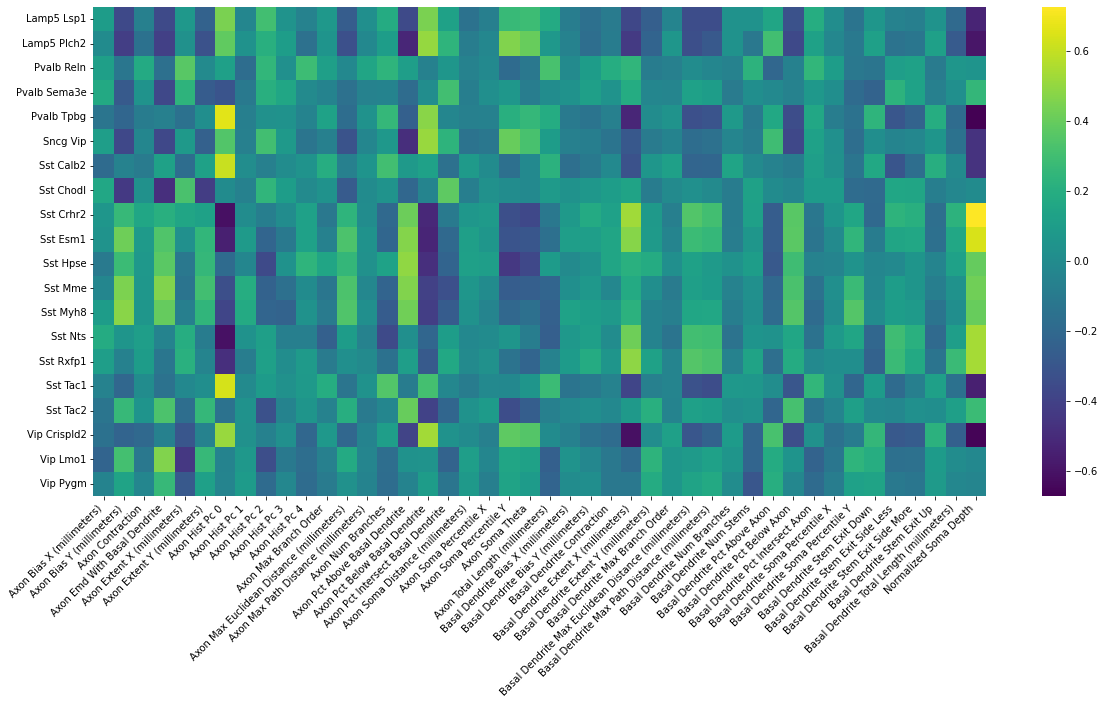

In [32]:
# Generate heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(20, 9))
h = sns.heatmap(corr_df, fmt="g", cmap="viridis")
h.set_xticklabels(h.get_xticklabels(),
                  horizontalalignment='right',
                          rotation=45) 
plt.show()           

In [6]:
corr_df.to_csv("gouwens-data/t_type_corr_fc2.csv")

In [33]:
# Collect feature-embedding pairs with r > 0.5
corr_dict = {
    "node": [],
    "feature": [],
    "corr": []
}

for index, row in corr_df.iterrows():
    for col, val in row.items():
        if np.absolute(val) > 0.5:
            corr_dict["node"].append(index)
            corr_dict["feature"].append(col)
            corr_dict["corr"].append(val)
            
pd.DataFrame(corr_dict)

,node,feature,corr
0,Lamp5 Lsp1,Normalized Soma Depth,-0.532616
1,Lamp5 Plch2,Axon Pct Above Basal Dendrite,-0.522905
2,Lamp5 Plch2,Axon Pct Below Basal Dendrite,0.505743
3,Lamp5 Plch2,Normalized Soma Depth,-0.592651
4,Pvalb Tpbg,Axon Hist Pc 0,0.662500
5,Pvalb Tpbg,Basal Dendrite Extent X (millimeters),-0.521103
6,Pvalb Tpbg,Normalized Soma Depth,-0.671744
7,Sncg Vip,Axon Pct Below Basal Dendrite,0.507235
8,Sst Calb2,Axon Hist Pc 0,0.605405
9,Sst Crhr2,Axon Hist Pc 0,-0.616259


### Examine correlation relationships between a single feature and all embeddings

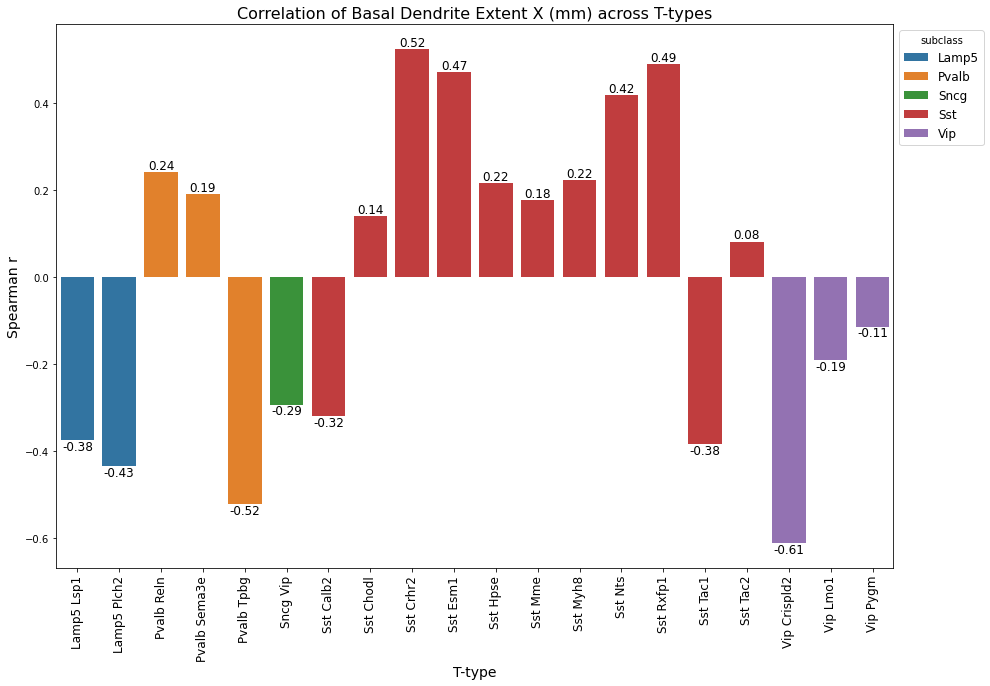

In [36]:
feature = "Basal Dendrite Extent X (millimeters)"
data = {}
data["t_type"] = corr_df[feature].index
data["corr"] = corr_df[feature].values
data["subclass"] = [t.split(" ")[0] for t in corr_df[feature].index]

fig, ax = plt.subplots(figsize=(15, 10))
bp = sns.barplot(data=pd.DataFrame(data), x="t_type", y="corr", hue="subclass", dodge=False)
bp.set_xticklabels(bp.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='center',
                          fontsize=12)
bp.set_xlabel("T-type", fontsize=14)
bp.set_ylabel("Spearman r", fontsize=14)
bp.set_title("Correlation of Basal Dendrite Extent X (mm) across T-types", fontsize=16)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize=12)

for c in ax.containers:
    ax.bar_label(c, labels=np.round(data["corr"], decimals=2), fontsize=12)

## MET type

### Compute correlation between features and embeddings

In [2]:
# Gather neural network embeddings from the last layer
embeddings = pd.read_csv("gouwens-data/met_type_embeddings_fc2.csv", index_col=0)
embeddings.columns = [
    'Lamp5-MET-1', 
    'Pvalb-MET-2', 
    'Pvalb-MET-4', 
    'Sncg-MET-1', 
    'Sst-MET-1', 
    'Sst-MET-10', 
    'Sst-MET-12', 
    'Sst-MET-13', 
    'Sst-MET-2', 
    'Sst-MET-3', 
    'Sst-MET-4', 
    'Sst-MET-5', 
    'Sst-MET-6', 
    'Sst-MET-8', 
    'Sst-MET-9', 
    'Vip-MET-1', 
    'Vip-MET-4', 
    'Vip-MET-5'
]
embeddings

,Lamp5-MET-1,Pvalb-MET-2,Pvalb-MET-4,Sncg-MET-1,Sst-MET-1,Sst-MET-10,Sst-MET-12,Sst-MET-13,Sst-MET-2,Sst-MET-3,Sst-MET-4,Sst-MET-5,Sst-MET-6,Sst-MET-8,Sst-MET-9,Vip-MET-1,Vip-MET-4,Vip-MET-5
Specimen ID,,,,,,,,,,,,,,,,,,
714755043,0.152507,1.266970,-1.752115,6.703519,1.241610,-1.135279,0.228064,0.343740,-1.607325,-0.795102,-2.163153,-4.101078,-2.160139,-1.231594,-4.966242,-1.998218,-3.790062,-4.317806
658012080,-2.502778,1.398784,-1.133168,0.880229,0.417258,-1.355544,5.369677,0.582781,-2.701472,0.348570,-2.143102,-2.959895,-2.640804,-2.071504,-2.072033,-2.013125,-2.669424,-7.062936
827447865,5.116225,-2.785596,2.371452,-2.379281,-0.216986,-4.401396,-1.499359,-2.934496,0.548210,3.708609,-0.956803,-7.779003,-4.194461,1.905573,-3.864418,-4.178980,-2.358423,-2.193637
645355846,0.164455,3.313234,-1.964996,0.778344,1.357411,-0.564930,2.823657,0.219622,-3.469912,-1.246021,-1.213456,-3.404154,-3.436338,-1.719455,-2.956465,-1.952866,-2.735465,-4.368217
829195312,-1.399999,-3.994133,-2.682586,-4.532663,-3.951333,-3.109335,-2.306709,-0.682733,-3.075680,0.609801,0.943328,-4.181052,-2.896850,1.327185,1.290056,-0.551820,1.101875,4.013701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692565557,-3.871404,0.032669,-5.415948,-3.739123,-7.666480,0.167258,-1.758070,6.835674,-4.758417,-4.092347,-0.141220,-2.249350,0.785227,-1.359951,-1.486892,-0.510482,-0.626555,-3.279202
646852171,0.540269,-3.825339,4.259540,-0.224170,-0.094290,-4.007408,0.051934,-2.223336,2.299146,1.925870,-1.839811,-1.383623,-0.805693,-0.324368,-2.590642,-1.496230,-0.472847,-2.711950
601811091,-4.960252,-0.632887,-0.260100,-2.809586,-2.393546,-3.962066,2.653569,7.188500,-4.426923,1.099998,-2.563422,-3.185679,-0.472882,1.145006,-3.734320,-5.265332,-0.433492,-5.869029


In [3]:
# Gather extracted morphology features
features = pd.read_csv("extracted_features.csv")
features = features.drop(["T type", "MET type"], axis=1)
features = features[features["Specimen ID"].isin(embeddings.index)]
features = features.set_index("Specimen ID")
features

,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,Axon Hist Pc 1,Axon Hist Pc 2,Axon Hist Pc 3,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
Specimen ID,,,,,,,,,,,,,,,,,,,,,
714755043,0.076087,0.021594,0.828949,14.596909,0.460521,0.258804,-704.739932,-18.761695,319.569827,74.102948,...,0.025154,0.839016,0.275014,0.419788,0.000000,0.00,0.333333,0.666667,2.522126,0.723234
658012080,0.135356,0.111187,0.855302,10.753656,0.690728,0.454090,-1254.649974,-187.936728,910.070179,506.015145,...,0.036473,0.963527,0.373547,0.580762,0.400000,0.00,0.400000,0.200000,3.656877,0.825192
827447865,0.066712,0.106764,0.798974,11.195610,0.424800,0.586675,786.188159,-735.106837,-962.950372,977.809846,...,0.000000,1.000000,0.364856,0.507987,0.200000,0.00,0.200000,0.600000,2.522022,0.321378
645355846,0.057112,0.194790,0.824124,10.766650,0.338256,0.353877,-1077.594368,-130.504684,753.264632,413.605107,...,0.000000,0.901451,0.490451,0.067227,0.250000,0.00,0.250000,0.500000,1.823485,0.858683
829195312,0.000556,0.287665,0.848207,22.412643,0.290394,0.662710,134.993804,-111.360885,-370.225143,17.630340,...,0.000000,1.000000,0.364030,0.619901,0.333333,0.00,0.333333,0.333333,2.055931,0.240781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692565557,0.057463,0.302951,0.861406,25.438343,0.677467,0.811727,-693.130384,80.354069,214.963381,29.890947,...,0.000000,1.000000,0.416236,0.497415,0.000000,0.20,0.600000,0.200000,2.656202,0.759089
646852171,0.028664,0.021350,0.853973,3.024985,0.318936,0.424402,-79.440785,-356.255902,-1150.192438,516.039587,...,0.000000,1.000000,0.300813,0.000000,0.000000,0.25,0.250000,0.500000,1.303221,0.503709
601811091,0.005654,0.459159,0.850263,41.430893,0.686437,1.020017,-485.913541,-135.069901,45.262030,-150.593571,...,0.000000,1.000000,0.244280,0.431365,0.250000,0.00,0.250000,0.500000,3.468154,0.824576


SpearmanrResult(correlation=0.375474145342582, pvalue=1.4534293829278796e-13)


<AxesSubplot:xlabel='Sst-MET-4', ylabel='Axon Pct Above Basal Dendrite'>

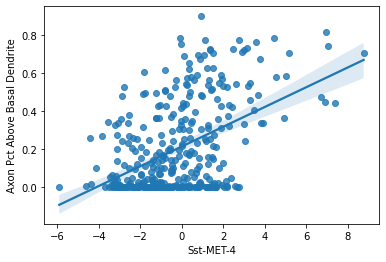

In [15]:
# Plot single feature-embedding pair as an example
node = embeddings["Sst-MET-4"]
feat = features["Axon Pct Above Basal Dendrite"]
print(scipy.stats.spearmanr(node, feat))
sns.regplot(x=node, y=feat)

SpearmanrResult(correlation=-0.12679090949865196, pvalue=0.015788539647797067)


<AxesSubplot:xlabel='Vip-MET-1', ylabel='Axon Pct Above Basal Dendrite'>

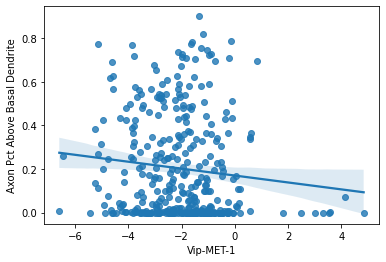

In [17]:
# Plot single feature-embedding pair as an example
node = embeddings["Vip-MET-1"]
feat = features["Axon Pct Above Basal Dendrite"]
print(scipy.stats.spearmanr(node, feat))
sns.regplot(x=node, y=feat)

In [19]:
# Compute correlation matrix
nodes = list(embeddings.columns)
feats = list(features.columns)

corr_matrix = np.zeros((len(nodes), len(feats)))

for i, node in enumerate(nodes):
    for j, feat in enumerate(feats):
        corr_matrix[i, j] = scipy.stats.spearmanr(embeddings[node], features[feat]).correlation

corr_df = pd.DataFrame(corr_matrix, columns=feats)
corr_df.index = nodes
corr_df

,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,Axon Hist Pc 1,Axon Hist Pc 2,Axon Hist Pc 3,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
Lamp5-MET-1,0.081423,-0.384006,-0.010874,-0.440464,0.177674,-0.277905,0.376138,-0.087139,0.365493,0.175934,...,-0.260941,0.244772,0.072833,-0.173776,0.013930,-0.066254,-0.053971,0.064502,-0.104655,-0.405795
Pvalb-MET-2,0.151529,-0.145821,0.049465,-0.276853,0.219980,-0.324059,-0.657013,-0.037873,0.191321,0.164315,...,0.073985,-0.147949,0.050731,0.028890,-0.188413,0.217984,0.152346,-0.113309,0.011200,0.459043
Pvalb-MET-4,0.030954,-0.224488,0.073475,-0.245766,0.143024,-0.114482,0.510895,-0.160552,0.184574,0.045715,...,-0.166888,0.259977,0.018101,-0.156975,0.028420,-0.128478,-0.044393,0.080276,-0.103055,-0.386572
Sncg-MET-1,0.288385,-0.297909,0.104964,-0.388134,0.438095,-0.294704,-0.059829,-0.079099,0.454002,0.102145,...,-0.143940,0.117747,0.101928,-0.123040,-0.144986,0.155634,0.154520,-0.122545,-0.020516,0.032084
Sst-MET-1,0.175706,-0.484487,-0.039711,-0.577458,0.212477,-0.513437,0.198264,-0.117879,0.300665,0.144260,...,-0.111544,0.059360,0.075123,-0.278464,-0.112309,0.011409,0.035376,0.042972,-0.087070,-0.224479
Sst-MET-10,0.043158,0.138291,-0.001283,0.051940,-0.112410,-0.081172,-0.678473,0.087285,-0.072260,-0.051225,...,0.168055,-0.270361,-0.042654,0.174902,-0.072074,0.148767,0.081787,-0.094111,0.022487,0.481535
Sst-MET-12,0.134399,0.066677,0.222508,0.019785,0.373555,0.004880,-0.514996,-0.131972,0.165601,0.092571,...,0.167517,-0.010115,0.130337,0.046697,-0.253129,0.301492,0.226980,-0.192630,0.163127,0.598807
Sst-MET-13,0.067912,0.212203,0.127460,0.187840,0.106548,0.074120,-0.666117,0.127817,-0.038986,-0.075052,...,0.214216,-0.185876,0.011166,0.237325,-0.184521,0.236835,0.190756,-0.139036,0.099136,0.596545
Sst-MET-2,0.002135,-0.259770,-0.055008,-0.180052,-0.029437,-0.113395,0.753092,0.061578,0.087608,-0.043913,...,-0.163475,0.231970,-0.025163,-0.166033,0.140624,-0.192952,-0.119049,0.096797,-0.132715,-0.626645
Sst-MET-3,-0.096984,-0.295241,-0.053273,-0.247686,0.016025,-0.149277,0.682209,-0.079894,0.101655,0.128172,...,-0.108135,0.216938,0.049981,-0.256168,0.069651,-0.222111,-0.116082,0.167902,-0.048770,-0.517870


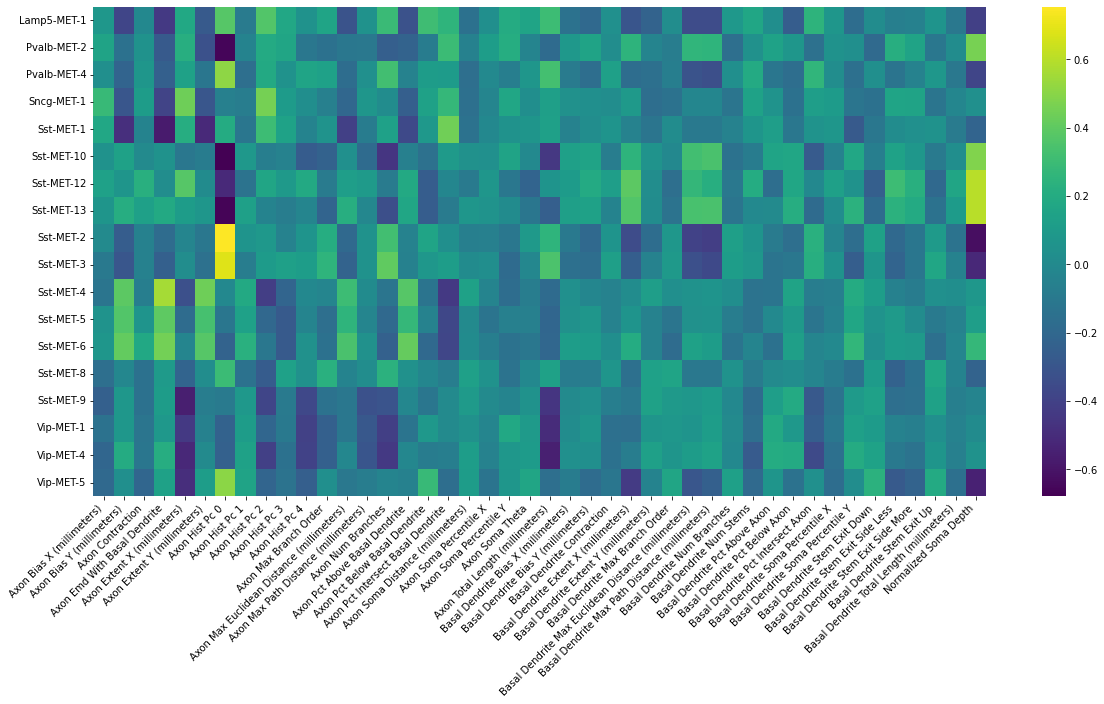

In [20]:
# Generate heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(20, 9))
h = sns.heatmap(corr_df, fmt="g", cmap="viridis")
h.set_xticklabels(h.get_xticklabels(),
                  horizontalalignment='right',
                          rotation=45) 
plt.show()           

In [19]:
corr_df.to_csv("gouwens-data/met_type_corr_fc2.csv")

In [21]:
# Collect feature-embedding pairs with r > 0.5
corr_dict = {
    "node": [],
    "feature": [],
    "corr": []
}

for index, row in corr_df.iterrows():
    for col, val in row.items():
        if np.absolute(val) > 0.5:
            corr_dict["node"].append(index)
            corr_dict["feature"].append(col)
            corr_dict["corr"].append(val)
            
pd.DataFrame(corr_dict)

,node,feature,corr
0,Pvalb-MET-2,Axon Hist Pc 0,-0.657013
1,Pvalb-MET-4,Axon Hist Pc 0,0.510895
2,Sst-MET-1,Axon Emd With Basal Dendrite,-0.577458
3,Sst-MET-1,Axon Extent Y (millimeters),-0.513437
4,Sst-MET-10,Axon Hist Pc 0,-0.678473
5,Sst-MET-12,Axon Hist Pc 0,-0.514996
6,Sst-MET-12,Normalized Soma Depth,0.598807
7,Sst-MET-13,Axon Hist Pc 0,-0.666117
8,Sst-MET-13,Normalized Soma Depth,0.596545
9,Sst-MET-2,Axon Hist Pc 0,0.753092


### Examine correlation relationships between a single feature and all embeddings

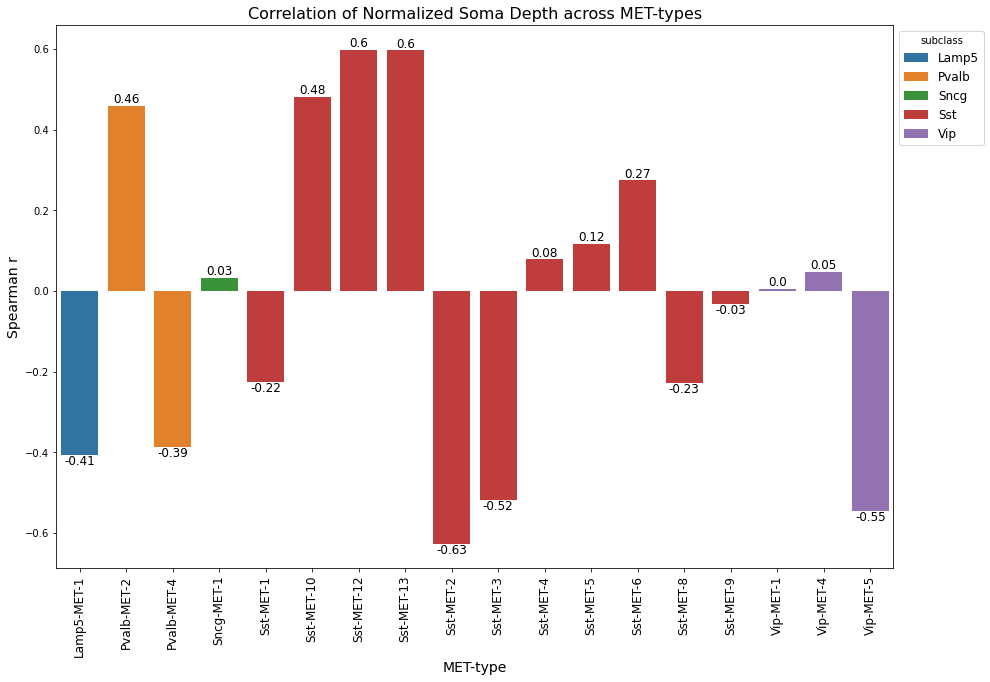

In [68]:
feature = "Normalized Soma Depth"
data = {}
data["met_type"] = corr_df[feature].index
data["corr"] = corr_df[feature].values
data["subclass"] = [t.split("-")[0] for t in corr_df[feature].index]

fig, ax = plt.subplots(figsize=(15, 10))
bp = sns.barplot(data=pd.DataFrame(data), x="met_type", y="corr", hue="subclass", dodge=False)
bp.set_xticklabels(bp.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='center',
                          fontsize=12)
bp.set_xlabel("MET-type", fontsize=14)
bp.set_ylabel("Spearman r", fontsize=14)
bp.set_title("Correlation of Normalized Soma Depth across MET-types", fontsize=16)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize=12)

for c in ax.containers:
    ax.bar_label(c, labels=np.round(data["corr"], decimals=2), fontsize=12)

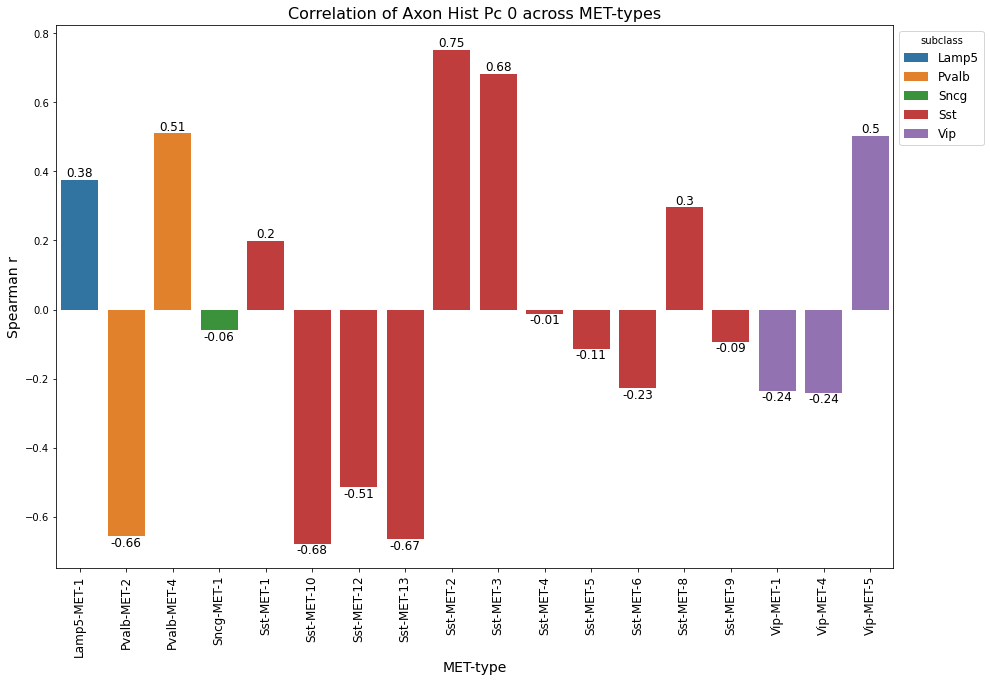

In [67]:
feature = "Axon Hist Pc 0"
data = {}
data["met_type"] = corr_df[feature].index
data["corr"] = corr_df[feature].values
data["subclass"] = [t.split("-")[0] for t in corr_df[feature].index]

fig, ax = plt.subplots(figsize=(15, 10))
bp = sns.barplot(data=pd.DataFrame(data), x="met_type", y="corr", hue="subclass", dodge=False)
bp.set_xticklabels(bp.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='center',
                          fontsize=12)
bp.set_xlabel("MET-type", fontsize=14)
bp.set_ylabel("Spearman r", fontsize=14)
bp.set_title("Correlation of Axon Hist Pc 0 across MET-types", fontsize=16)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize=12)

for c in ax.containers:
    ax.bar_label(c, labels=np.round(data["corr"], decimals=2), fontsize=12)

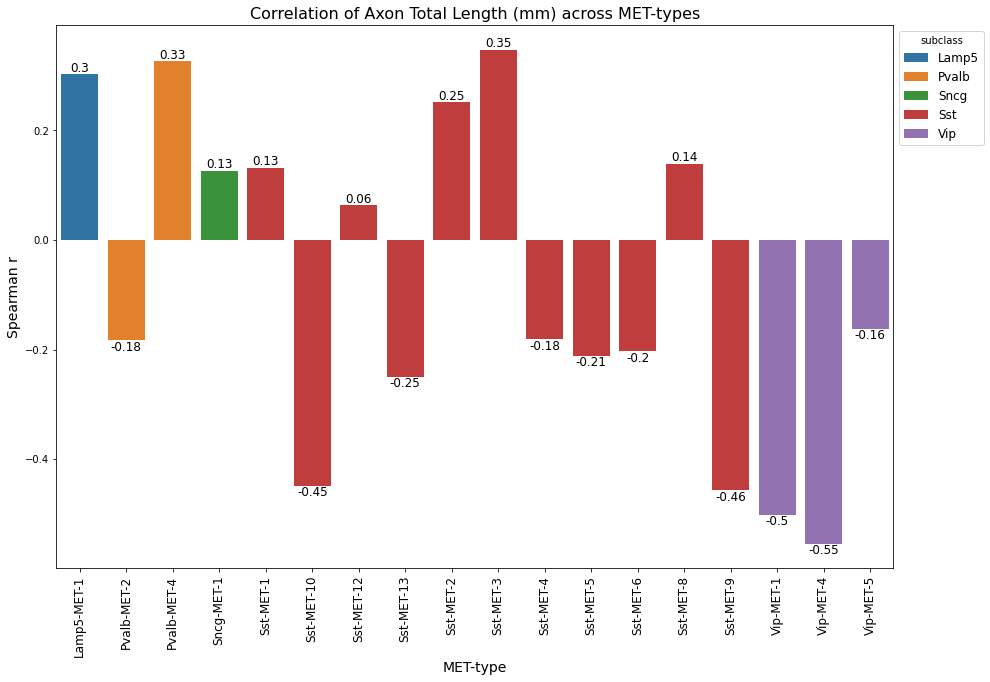

In [69]:
feature = "Axon Total Length (millimeters)"
data = {}
data["met_type"] = corr_df[feature].index
data["corr"] = corr_df[feature].values
data["subclass"] = [t.split("-")[0] for t in corr_df[feature].index]

fig, ax = plt.subplots(figsize=(15, 10))
bp = sns.barplot(data=pd.DataFrame(data), x="met_type", y="corr", hue="subclass", dodge=False)
bp.set_xticklabels(bp.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='center',
                          fontsize=12)
bp.set_xlabel("MET-type", fontsize=14)
bp.set_ylabel("Spearman r", fontsize=14)
bp.set_title("Correlation of Axon Total Length (mm) across MET-types", fontsize=16)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize=12)

for c in ax.containers:
    ax.bar_label(c, labels=np.round(data["corr"], decimals=2), fontsize=12)

### Recompute correlation matrix with modified (dendrite-focused) images

In [18]:
# Gather neural network embeddings from last layer
embeddings = pd.read_csv("gouwens-data/met_type_embeddings_modified.csv", index_col=0)
embeddings.columns = [
    'Lamp5-MET-1', 
    'Pvalb-MET-2', 
    'Pvalb-MET-4', 
    'Sncg-MET-1', 
    'Sst-MET-1', 
    'Sst-MET-10', 
    'Sst-MET-12', 
    'Sst-MET-13', 
    'Sst-MET-2', 
    'Sst-MET-3', 
    'Sst-MET-4', 
    'Sst-MET-5', 
    'Sst-MET-6', 
    'Sst-MET-8', 
    'Sst-MET-9', 
    'Vip-MET-1', 
    'Vip-MET-4', 
    'Vip-MET-5'
]
embeddings

,Lamp5-MET-1,Pvalb-MET-2,Pvalb-MET-4,Sncg-MET-1,Sst-MET-1,Sst-MET-10,Sst-MET-12,Sst-MET-13,Sst-MET-2,Sst-MET-3,Sst-MET-4,Sst-MET-5,Sst-MET-6,Sst-MET-8,Sst-MET-9,Vip-MET-1,Vip-MET-4,Vip-MET-5
Specimen ID,,,,,,,,,,,,,,,,,,
714755043,1.689248,3.315467,-1.130895,8.274201,2.945957,-3.763903,-0.867099,0.703429,0.870629,-0.136714,-4.122654,-5.536825,-2.096765,-1.299375,-5.970738,-2.198861,-5.700409,-3.018638
658012080,-1.997279,1.984514,-2.055611,-1.877926,0.595389,2.286755,7.257100,1.735553,0.079010,-0.492373,-2.373283,-1.614558,-4.137555,-2.383930,-2.733229,-1.617037,-2.872411,-5.145671
827447865,8.022367,-0.371692,2.355003,-2.605646,0.236624,-4.367998,-3.257608,-2.452784,0.612203,1.305078,-2.210897,-5.814667,-5.137983,0.784683,-5.771764,-1.048360,-2.655627,-0.263986
645355846,0.896662,3.155011,-2.709618,1.903135,3.677167,-0.096136,2.264015,0.304201,-1.089265,-3.279111,-2.286678,-2.405039,-4.720448,-2.520240,-6.144317,0.197276,-1.222533,-1.485335
829195312,1.574186,-1.381624,-0.389040,-2.516788,-2.006319,-5.269281,-4.587699,-3.382051,-1.465011,-1.434948,-1.350689,-3.812661,-4.426179,-0.073283,-4.434816,1.268247,1.776303,5.681865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692565557,-3.294170,-0.192810,-2.347735,-4.070417,-5.154749,1.533579,0.534229,5.785807,-2.685799,-2.709640,0.619155,0.037410,2.362207,0.040922,0.026547,0.622088,-0.759068,-5.398301
646852171,2.260514,-3.495511,7.299817,0.693245,0.384400,-4.550682,-1.395900,-2.258332,3.117693,2.614447,-4.939277,-2.407079,-3.974739,-1.089130,-5.989529,-1.799994,-3.471728,-1.834221
601811091,-3.123724,1.473478,1.532539,-3.430355,-0.972974,-1.702971,2.283701,6.623637,-2.361887,-0.015862,-1.018332,-1.795750,-1.432751,1.779446,0.169289,-2.182984,-2.937943,-4.754605


In [19]:
# Load extracted morphology features
features = pd.read_csv("extracted_features.csv")
features = features.drop(["T type", "MET type"], axis=1)
features = features[features["Specimen ID"].isin(embeddings.index)]
features = features.set_index("Specimen ID")
features

,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,Axon Hist Pc 1,Axon Hist Pc 2,Axon Hist Pc 3,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
Specimen ID,,,,,,,,,,,,,,,,,,,,,
714755043,0.076087,0.021594,0.828949,14.596909,0.460521,0.258804,-704.739932,-18.761695,319.569827,74.102948,...,0.025154,0.839016,0.275014,0.419788,0.000000,0.00,0.333333,0.666667,2.522126,0.723234
658012080,0.135356,0.111187,0.855302,10.753656,0.690728,0.454090,-1254.649974,-187.936728,910.070179,506.015145,...,0.036473,0.963527,0.373547,0.580762,0.400000,0.00,0.400000,0.200000,3.656877,0.825192
827447865,0.066712,0.106764,0.798974,11.195610,0.424800,0.586675,786.188159,-735.106837,-962.950372,977.809846,...,0.000000,1.000000,0.364856,0.507987,0.200000,0.00,0.200000,0.600000,2.522022,0.321378
645355846,0.057112,0.194790,0.824124,10.766650,0.338256,0.353877,-1077.594368,-130.504684,753.264632,413.605107,...,0.000000,0.901451,0.490451,0.067227,0.250000,0.00,0.250000,0.500000,1.823485,0.858683
829195312,0.000556,0.287665,0.848207,22.412643,0.290394,0.662710,134.993804,-111.360885,-370.225143,17.630340,...,0.000000,1.000000,0.364030,0.619901,0.333333,0.00,0.333333,0.333333,2.055931,0.240781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692565557,0.057463,0.302951,0.861406,25.438343,0.677467,0.811727,-693.130384,80.354069,214.963381,29.890947,...,0.000000,1.000000,0.416236,0.497415,0.000000,0.20,0.600000,0.200000,2.656202,0.759089
646852171,0.028664,0.021350,0.853973,3.024985,0.318936,0.424402,-79.440785,-356.255902,-1150.192438,516.039587,...,0.000000,1.000000,0.300813,0.000000,0.000000,0.25,0.250000,0.500000,1.303221,0.503709
601811091,0.005654,0.459159,0.850263,41.430893,0.686437,1.020017,-485.913541,-135.069901,45.262030,-150.593571,...,0.000000,1.000000,0.244280,0.431365,0.250000,0.00,0.250000,0.500000,3.468154,0.824576


SpearmanrResult(correlation=0.5906107817683265, pvalue=2.0702953793791462e-35)


<AxesSubplot:xlabel='Sst-MET-4', ylabel='Axon Pct Above Basal Dendrite'>

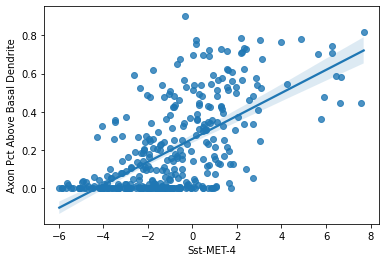

In [20]:
# Plot single feature-embedding pair as an example
node = embeddings["Sst-MET-4"]
feat = features["Axon Pct Above Basal Dendrite"]
print(scipy.stats.spearmanr(node, feat))
sns.regplot(x=node, y=feat)

SpearmanrResult(correlation=-0.5015303564842997, pvalue=1.8655202904885434e-24)


<AxesSubplot:xlabel='Vip-MET-1', ylabel='Axon Pct Above Basal Dendrite'>

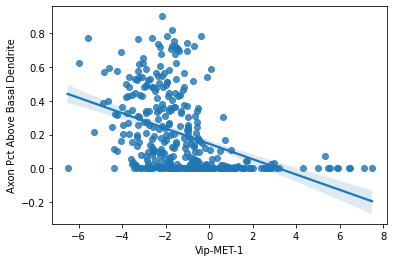

In [21]:
# Plot single feature-embedding pair as an example
node = embeddings["Vip-MET-1"]
feat = features["Axon Pct Above Basal Dendrite"]
print(scipy.stats.spearmanr(node, feat))
sns.regplot(x=node, y=feat)

In [39]:
# Compute correlation matrix
nodes = list(embeddings.columns)
feats = list(features.columns)

corr_matrix = np.zeros((len(nodes), len(feats)))

for i, node in enumerate(nodes):
    for j, feat in enumerate(feats):
        corr_matrix[i, j] = scipy.stats.spearmanr(embeddings[node], features[feat]).correlation

corr_df = pd.DataFrame(corr_matrix, columns=feats)
corr_df.index = nodes
corr_df

,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,Axon Hist Pc 1,Axon Hist Pc 2,Axon Hist Pc 3,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
Lamp5-MET-1,0.037503,-0.483685,-0.109264,-0.518300,0.093796,-0.395308,0.294942,-0.089540,0.335669,0.205292,...,-0.312156,0.171427,0.003693,-0.200628,0.025221,-0.071868,-0.092378,0.094848,-0.131177,-0.443909
Pvalb-MET-2,0.104745,-0.297646,0.060708,-0.352934,0.203645,-0.338096,-0.528376,-0.166000,0.195914,0.275782,...,-0.038472,-0.019936,0.058566,-0.120600,-0.200893,0.138463,0.118178,-0.033064,0.030835,0.370268
Pvalb-MET-4,-0.115434,-0.196158,0.023507,-0.186031,0.048311,-0.025241,0.522639,-0.245925,0.086865,0.086683,...,-0.246474,0.242395,-0.046280,-0.210975,0.093152,-0.218496,-0.128260,0.144577,-0.099127,-0.417706
Sncg-MET-1,0.317998,-0.291955,-0.011508,-0.416665,0.229132,-0.334714,0.016075,-0.052211,0.399949,0.036634,...,-0.252005,0.063354,0.058690,-0.161013,-0.076554,0.080170,0.065304,-0.031558,-0.104518,-0.154428
Sst-MET-1,0.228709,-0.455845,-0.037384,-0.590507,0.271440,-0.473719,0.024299,-0.164968,0.358699,0.186711,...,-0.240929,0.123430,0.064144,-0.265714,-0.156957,0.100722,0.064005,-0.000833,-0.119597,-0.138834
Sst-MET-10,0.022366,0.247322,0.106908,0.181345,0.078565,0.126538,-0.627756,0.158342,-0.123912,-0.080884,...,0.359420,-0.147949,0.043268,0.268532,-0.146455,0.205622,0.201035,-0.175285,0.119504,0.627499
Sst-MET-12,0.101538,0.223647,0.211417,0.193761,0.230414,0.117484,-0.602001,0.020427,0.009609,-0.000432,...,0.385905,-0.088267,0.148141,0.169990,-0.263770,0.308118,0.274597,-0.219004,0.219581,0.744649
Sst-MET-13,0.174686,0.216184,0.161996,0.124319,0.228855,0.060993,-0.618732,0.159839,-0.007056,-0.111623,...,0.362497,-0.121727,0.097216,0.239274,-0.227150,0.299647,0.258984,-0.227103,0.140726,0.672835
Sst-MET-2,0.018411,-0.376264,-0.025893,-0.320543,0.129269,-0.150971,0.614235,-0.012677,0.212010,0.050217,...,-0.230546,0.276353,0.023082,-0.236416,0.038667,-0.128112,-0.065257,0.094395,-0.140559,-0.516136
Sst-MET-3,-0.083663,-0.330430,-0.029206,-0.286726,0.052505,-0.187827,0.529369,0.031777,0.176690,0.108602,...,-0.017499,0.223895,0.088509,-0.251125,-0.048224,-0.089148,-0.036120,0.096468,0.003250,-0.328312


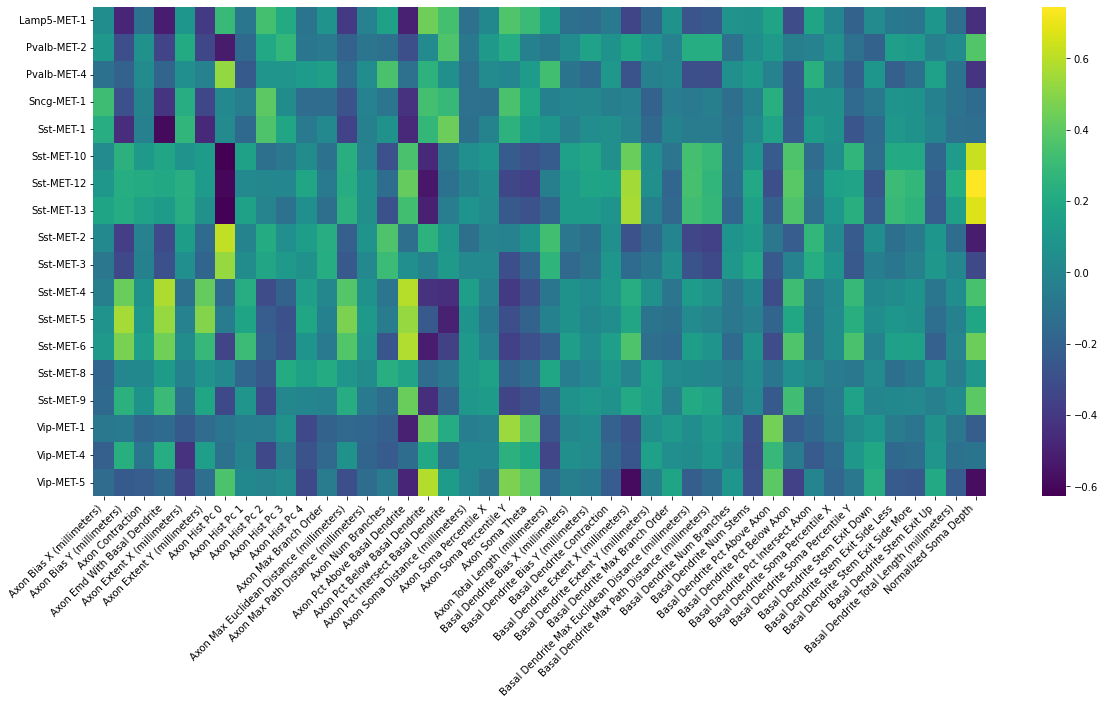

In [40]:
# Generate heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(20, 9))
h = sns.heatmap(corr_df, fmt="g", cmap="viridis")
h.set_xticklabels(h.get_xticklabels(),
                  horizontalalignment='right',
                          rotation=45) 
plt.show()           

In [19]:
corr_df.to_csv("gouwens-data/met_type_corr_fc2.csv")

In [41]:
# Collect feature-embedding pairs with r > 0.5
corr_dict = {
    "node": [],
    "feature": [],
    "corr": []
}

for index, row in corr_df.iterrows():
    for col, val in row.items():
        if np.absolute(val) > 0.5:
            corr_dict["node"].append(index)
            corr_dict["feature"].append(col)
            corr_dict["corr"].append(val)
            
pd.DataFrame(corr_dict)

,node,feature,corr
0,Lamp5-MET-1,Axon Emd With Basal Dendrite,-0.518300
1,Lamp5-MET-1,Axon Pct Above Basal Dendrite,-0.503377
2,Pvalb-MET-2,Axon Hist Pc 0,-0.528376
3,Pvalb-MET-4,Axon Hist Pc 0,0.522639
4,Sst-MET-1,Axon Emd With Basal Dendrite,-0.590507
5,Sst-MET-10,Axon Hist Pc 0,-0.627756
6,Sst-MET-10,Normalized Soma Depth,0.627499
7,Sst-MET-12,Axon Hist Pc 0,-0.602001
8,Sst-MET-12,Axon Pct Below Basal Dendrite,-0.543805
9,Sst-MET-12,Basal Dendrite Extent X (millimeters),0.552287


### Examine correlation relationships between a single feature and all embeddings

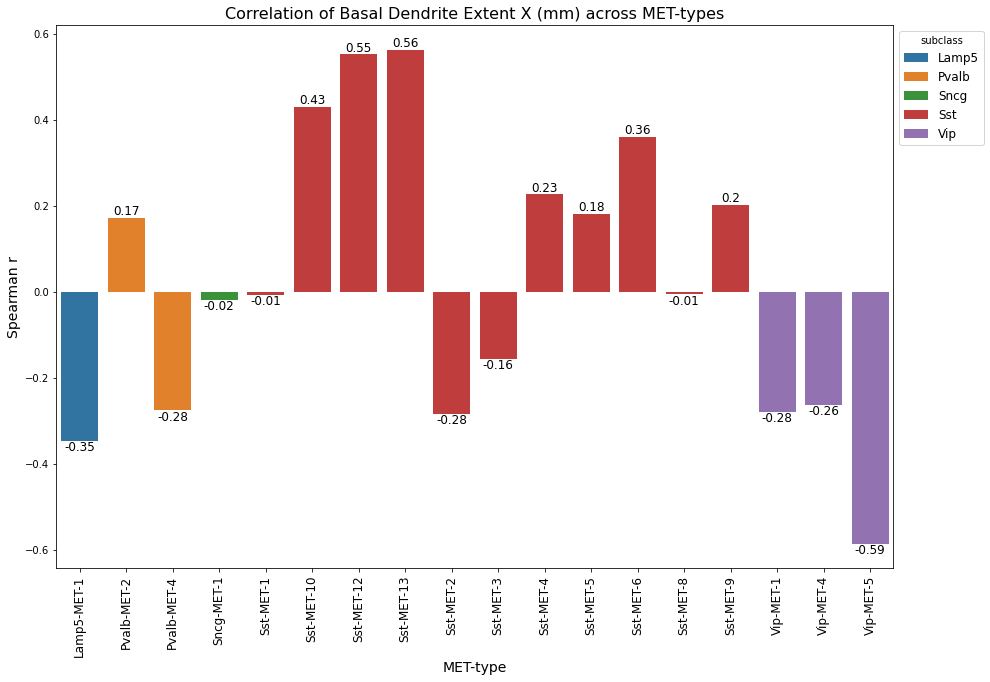

In [43]:
feature = "Basal Dendrite Extent X (millimeters)"
data = {}
data["met_type"] = corr_df[feature].index
data["corr"] = corr_df[feature].values
data["subclass"] = [t.split("-")[0] for t in corr_df[feature].index]

fig, ax = plt.subplots(figsize=(15, 10))
bp = sns.barplot(data=pd.DataFrame(data), x="met_type", y="corr", hue="subclass", dodge=False)
bp.set_xticklabels(bp.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='center',
                          fontsize=12)
bp.set_xlabel("MET-type", fontsize=14)
bp.set_ylabel("Spearman r", fontsize=14)
bp.set_title("Correlation of Basal Dendrite Extent X (mm) across MET-types", fontsize=16)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize=12)

for c in ax.containers:
    ax.bar_label(c, labels=np.round(data["corr"], decimals=2), fontsize=12)